# Topic: Image classification for color images
## Goal : In this project, we will train a CNN to classify images
## Dataset : CIFAR-10 dataset

In [3]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [6]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Dropout, MaxPool2D, Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint

In [7]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

/home/mosioatunya/anaconda3/envs/tensorflow/lib/python3.8/site-packages/matplotlib/text.py:1163: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


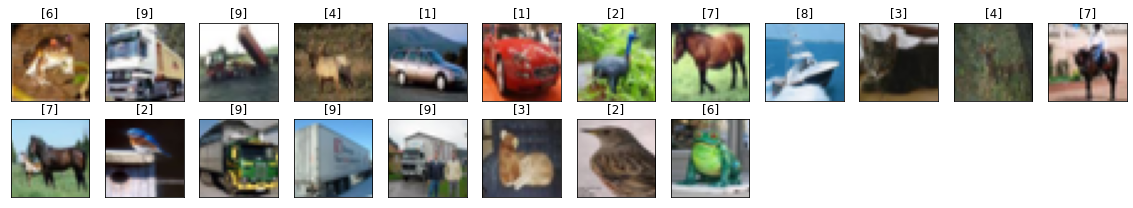

In [8]:
sample_image = X_train[:20] # a copy of the training data for visualization
sample_label = y_train[:20]

fig = plt.figure(figsize=(20,5))
for i in range(0, 20):
    ax = fig.add_subplot(3, 12, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(sample_image[i]))
    plt.title(sample_label[i]) # show what number represents what image.

In [9]:
# Rescaling the images

image_sets = [X_train, X_test]

def preprocessing(image_sets : list) -> tuple :
    '''turn the images into a float32 data type and rescle it's values.
    '''
    for items in image_sets:
        X_train = image_sets[0].astype('float32')
        X_test = image_sets[1].astype('float32')
    return (X_train/225, X_test/225)


def one_hot_encoding(y_train, y_test) -> tuple:
    '''Change the labels of both the training and test set
    into categories using the number of unique elements in them'''
    classes = len(np.unique(y_train))
    y_train = to_categorical(y_train, num_classes=classes)
    y_test = to_categorical(y_test, num_classes=classes)
    return y_train, y_test

X_train, X_test = preprocessing(image_sets)
y_train, y_test = one_hot_encoding(y_train, y_test)

In [10]:
X_train.shape, X_test.shape, sample_image.shape, y_train.shape

((50000, 32, 32, 3), (10000, 32, 32, 3), (20, 32, 32, 3), (50000, 10))

In [11]:
# creating a validation set
def split_data(split_set : np.ndarray, split_size :int) -> tuple:
    '''This would create a sub-sample for the validation set
    NB : be careful how you want to split the train set. using a high 
    split size might make the training set smaller than the validation
    set
    '''
    return split_set[split_size:], split_set[:split_size]

X_train, X_valid = split_data(X_train, 5000)
y_train, y_valid = split_data(y_train, 5000)

In [12]:
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')
print(X_valid.shape[0], 'validation samples')

45000 train samples
10000 test samples
5000 validation samples


In [13]:
# Building a model similar to AlexNet architecture

model = Sequential()

# layer 1 
model.add(Conv2D(16, kernel_size=2, padding='same',
                activation = 'relu', input_shape=(32, 32, 3)))
model.add(MaxPool2D(pool_size=2))

# layer 2 
model.add(Conv2D(32, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2))

# layer 3
model.add(Conv2D(64, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2))

model.add(Dropout(rate=0.3))
model.add(Flatten())

model.add(Dense(500, activation='relu'))
model.add(Dropout(rate=0.4))

model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 16)        208       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 32)        2080      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 64)          8256      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
dropout (Dropout)            (None, 4, 4, 64)          0

In [14]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'])

# this would save the best weights values
callback = ModelCheckpoint(filepath='model.weights.best.hdf5', save_best_only=True) 

model.fit(X_train, y_train, batch_size=32, epochs=100,
         validation_data=(X_valid, y_valid), callbacks=[callback])

Epoch 1/100
1407/1407 [==============================] - 36s 24ms/step - loss: 1.7858 - accuracy: 0.3438 - val_loss: 1.3746 - val_accuracy: 0.4944
Epoch 2/100
1407/1407 [==============================] - 33s 23ms/step - loss: 1.3012 - accuracy: 0.5367 - val_loss: 1.2688 - val_accuracy: 0.5418
Epoch 3/100
1407/1407 [==============================] - 33s 23ms/step - loss: 1.1707 - accuracy: 0.5839 - val_loss: 1.1064 - val_accuracy: 0.6168
Epoch 4/100
1407/1407 [==============================] - 34s 24ms/step - loss: 1.0962 - accuracy: 0.6142 - val_loss: 1.0286 - val_accuracy: 0.6464
Epoch 5/100
1407/1407 [==============================] - 33s 24ms/step - loss: 1.0484 - accuracy: 0.6318 - val_loss: 1.0445 - val_accuracy: 0.6436
Epoch 6/100
1407/1407 [==============================] - 33s 23ms/step - loss: 1.0260 - accuracy: 0.6450 - val_loss: 0.9656 - val_accuracy: 0.6726
Epoch 7/100
1407/1407 [==============================] - 32s 23ms/step - loss: 1.0032 - accuracy: 0.6574 - val_loss: 1

In [24]:
# Evaluating the model on the test data using the best weight values

model.load_weights('model.weights.best.hdf5')

scores = model.evaluate(X_test, y_test, verbose=2)

313/313 - 2s - loss: 0.9779 - accuracy: 0.6632


In [25]:
print(f'loss : {scores[0]}, accuracy : {scores[1]*100}')

loss : 0.9778556823730469, accuracy : 66.32000207901001
